In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [2]:
dataset = pd.read_csv('preprocessing_data.csv')
dataset.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,...,HS_Moderate,HS_Strong,Tweet_lower,Tweet_filtering,Tweet_token,Tweet_token_freq,Tweet_stopword,Tweet_normalized,Tweet_stemmed,Tweet_stemmed_join
0,di saat cowok usaha lacak perhati gue kamu lan...,1,1,1,0,0,0,0,0,1,...,0,0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,"['disaat', 'semua', 'cowok', 'berusaha', 'mela...",<FreqDist with 17 samples and 21 outcomes>,"['disaat', 'cowok', 'berusaha', 'melacak', 'pe...","['di saat', 'cowok', 'berusaha', 'melacak', 'p...","['di saat', 'cowok', 'usaha', 'lacak', 'perhat...",di saat cowok usaha lacak perhati gue kamu lan...
1,rt user user telat beri tau eluedan sarap gue ...,0,1,0,0,0,0,0,0,0,...,0,0,rt user: user siapa yang telat ngasih tau elu?...,RT USER USER siapa yang telat ngasih tau elued...,"['RT', 'USER', 'USER', 'siapa', 'yang', 'telat...",<FreqDist with 19 samples and 21 outcomes>,"['RT', 'USER', 'USER', 'telat', 'ngasih', 'tau...","['RT', 'USER', 'USER', 'telat', 'memberi', 'ta...","['rt', 'user', 'user', 'telat', 'beri', 'tau',...",rt user user telat beri tau eluedan sarap gue ...
2,41 kadang pikir percaya tuhan jatuh berkalikal...,0,0,0,0,0,0,0,0,0,...,0,0,"41. kadang aku berfikir, kenapa aku tetap perc...",41 Kadang aku berfikir kenapa aku tetap percay...,"['41', 'Kadang', 'aku', 'berfikir', 'kenapa', ...",<FreqDist with 29 samples and 37 outcomes>,"['41', 'Kadang', 'berfikir', 'percaya', 'Tuhan...","['41', 'Kadang', 'berpikir', 'percaya', 'Tuhan...","['41', 'kadang', 'pikir', 'percaya', 'tuhan', ...",41 kadang pikir percaya tuhan jatuh berkalikal...
3,user user aku itu aku ku tau mata sipit tapi l...,0,0,0,0,0,0,0,0,0,...,0,0,user user aku itu aku\n\nku tau matamu sipit t...,USER USER AKU ITU AKU KU TAU MATAMU SIPIT TAPI...,"['USER', 'USER', 'AKU', 'ITU', 'AKU', 'KU', 'T...",<FreqDist with 11 samples and 15 outcomes>,"['USER', 'USER', 'AKU', 'ITU', 'AKU', 'KU', 'T...","['USER', 'USER', 'AKU', 'ITU', 'AKU', 'KU', 'T...","['user', 'user', 'aku', 'itu', 'aku', 'ku', 't...",user user aku itu aku ku tau mata sipit tapi l...
4,user user kaum cebong kafir sudah lihat dongok...,1,1,0,1,1,0,0,0,0,...,1,0,user user kaum cebong kapir udah keliatan dong...,USER USER Kaum cebong kapir udah keliatan dong...,"['USER', 'USER', 'Kaum', 'cebong', 'kapir', 'u...",<FreqDist with 13 samples and 14 outcomes>,"['USER', 'USER', 'Kaum', 'cebong', 'kapir', 'u...","['USER', 'USER', 'Kaum', 'cebong', 'kafir', 's...","['user', 'user', 'kaum', 'cebong', 'kafir', 's...",user user kaum cebong kafir sudah lihat dongok...


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Tweet               13168 non-null  object
 1   HS                  13169 non-null  int64 
 2   Abusive             13169 non-null  int64 
 3   HS_Individual       13169 non-null  int64 
 4   HS_Group            13169 non-null  int64 
 5   HS_Religion         13169 non-null  int64 
 6   HS_Race             13169 non-null  int64 
 7   HS_Physical         13169 non-null  int64 
 8   HS_Gender           13169 non-null  int64 
 9   HS_Other            13169 non-null  int64 
 10  HS_Weak             13169 non-null  int64 
 11  HS_Moderate         13169 non-null  int64 
 12  HS_Strong           13169 non-null  int64 
 13  Tweet_lower         13169 non-null  object
 14  Tweet_filtering     13168 non-null  object
 15  Tweet_token         13169 non-null  object
 16  Tweet_token_freq    13

In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
HS,13169.0,0.422280,0.493941,0.0,0.0,0.0,1.0,1.0
Abusive,13169.0,0.382945,0.486123,0.0,0.0,0.0,1.0,1.0
HS_Individual,13169.0,0.271471,0.444735,0.0,0.0,0.0,1.0,1.0
HS_Group,13169.0,0.150809,0.357876,0.0,0.0,0.0,0.0,1.0
HS_Religion,13169.0,0.060217,0.237898,0.0,0.0,0.0,0.0,1.0
HS_Race,13169.0,0.042980,0.202819,0.0,0.0,0.0,0.0,1.0
HS_Physical,13169.0,0.024527,0.154685,0.0,0.0,0.0,0.0,1.0
HS_Gender,13169.0,0.023236,0.150659,0.0,0.0,0.0,0.0,1.0
HS_Other,13169.0,0.284000,0.450954,0.0,0.0,0.0,1.0,1.0
HS_Weak,13169.0,0.256891,0.436935,0.0,0.0,0.0,1.0,1.0


In [5]:
dt_transformed = dataset[['HS', 'Tweet']]
y = dt_transformed.iloc[:, 0].values

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y = np.array(ct.fit_transform(y.reshape(-1, 1)))

print(y)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [6]:
y_df = pd.DataFrame(y)
y_hate = np.array(y_df[0])
y_offensive = np.array(y_df[1])

In [7]:
print(y_hate)
print(y_offensive)

[0. 1. 1. ... 1. 1. 0.]
[1. 0. 0. ... 0. 0. 1.]


In [8]:
cv = CountVectorizer(max_features=2000)
X = cv.fit_transform(dataset['Tweet_stemmed']).toarray()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hate, test_size=0.2, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y_hate, test_size=0.2, random_state=0)

print ("Number of transacctions X_train dataset: ", X_train.shape)
print ("Number of transacctions y_train dataset: ", y_train.shape)
print ("Number of transacctions X_test dataset: ", X_test.shape)
print ("Number of transacctions y_test dataset: ", y_test.shape)

Number of transacctions X_train dataset:  (10535, 2000)
Number of transacctions y_train dataset:  (10535,)
Number of transacctions X_test dataset:  (2634, 2000)
Number of transacctions y_test dataset:  (2634,)


In [12]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


Before OverSampling, counts of label '1': 6061
Before OverSampling, counts of label '0': 4474 

After OverSampling, the shape of train_X: (12122, 2000)
After OverSampling, the shape of train_y: (12122,) 

After OverSampling, counts of label '1': 6061
After OverSampling, counts of label '0': 6061


In [13]:
classifier = MultinomialNB()
classifier.fit(X_train_res, y_train_res)

MultinomialNB()

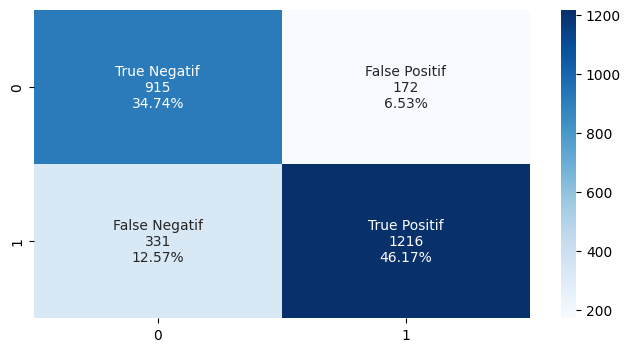

In [14]:
import seaborn as sns

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

group_names = ['True Negatif','False Positif','False Negatif','True Positif']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()



In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78      1087
         1.0       0.88      0.79      0.83      1547

    accuracy                           0.81      2634
   macro avg       0.81      0.81      0.81      2634
weighted avg       0.82      0.81      0.81      2634



In [16]:
import random 

data_try = pd.read_csv('data.csv', encoding='latin-1')

def classify_text(text):
    # Preprocess the input text
    processed_text = re.sub('[^a-zA-Z]', ' ', text)
    processed_text = processed_text.lower()
    processed_text = processed_text.split()
    ps = PorterStemmer()
    stop_words = set(stopwords.words('indonesian'))
    stop_words.remove('tidak')
    processed_text = [ps.stem(word) for word in processed_text if not word in set(stop_words)]
    processed_text = ' '.join(processed_text)
    
    # Vectorize the preprocessed text
    text_vector = cv.transform([processed_text]).toarray()
    
    # Scale the vectorized text
    scaled_text = sc.transform(text_vector)
    
    # Classify the text
    classification = classifier.predict(scaled_text)
    
    return classification

# Test the classifier with input text and classification
input_text = random.choice(data_try['Tweet'])
classification = classify_text(input_text)
print(f"Input Text: {input_text}")
print(f"Classification: {classification}")



Input Text: Dosa di rumah atau di tempat privasi kamu, itu kamu dengan Tuhan. \n\nTapi, jgn mempengaruhi budaya songsang ini kepada mereka yg tidak bersetuju denganmu dan jgnlah merosakkan sistem kekeluargaan normal manusia.\n\nTolak budaya LGBT \xf0\x9f\x8f\xb3\xef
Classification: [1.]
